In [2]:
from google.colab import files
a = files.upload()

Saving Corona_NLP_test.csv to Corona_NLP_test.csv


In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv('Corona_NLP_test.csv')
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [4]:
data.isnull().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [5]:
data['OriginalTweet'][0]

'TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1'

In [6]:
data.Sentiment.value_counts()

Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64

In [8]:
data['Sentiment'].unique()

array(['Extremely Negative', 'Positive', 'Extremely Positive', 'Negative',
       'Neutral'], dtype=object)

In [11]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sentiment'] = le.fit_transform(data['Sentiment'])

In [13]:
data['Sentiment'].head(5)

0    0
1    4
2    1
3    2
4    3
Name: Sentiment, dtype: int64

In [14]:
data.isnull().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [15]:
data.shape

(3798, 6)

In [16]:
data=data.dropna(axis=1)

In [17]:
data.isnull().sum()

UserName         0
ScreenName       0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

In [18]:
x = data.drop('Sentiment',axis=1)
y = data['Sentiment'].values

In [19]:
x.head()

,UserName,ScreenName,TweetAt,OriginalTweet
0,1,44953,02-03-2020,TRENDING: New Yorkers encounter empty supermar...
1,2,44954,02-03-2020,When I couldn't find hand sanitizer at Fred Me...
2,3,44955,02-03-2020,Find out how you can protect yourself and love...
3,4,44956,02-03-2020,#Panic buying hits #NewYork City as anxious sh...
4,5,44957,03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...


In [20]:
y

array([0, 4, 1, ..., 3, 0, 1])

In [21]:
y.reshape(-1,1)

array([[0],
       [4],
       [1],
       ...,
       [3],
       [0],
       [1]])

In [23]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [24]:
message = x.copy()

In [28]:
nltk.download('stopwords')
message.reset_index(inplace=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [29]:
ps = PorterStemmer()
corpus = []
for i in range(len(x)):
  review = re.sub('[^a-zA-Z]',' ', message['OriginalTweet'][i])
  review = review.lower()
  review = review.split()

  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [30]:
corpus[0]

'trend new yorker encount empti supermarket shelv pictur wegman brooklyn sold onlin grocer foodkick maxdeliveri coronaviru fear shopper stock http co gr pcrlwh http co ivmkmsqdt'

In [31]:
import tensorflow
from tensorflow import keras
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
voc_size = 50000
one_hot_r = [one_hot(word,voc_size) for word in corpus]

In [35]:
one_hot_r

[[44415,
  29224,
  21267,
  9368,
  3168,
  20336,
  15990,
  37220,
  19543,
  660,
  23699,
  41992,
  35345,
  26180,
  39334,
  29445,
  23446,
  21951,
  8208,
  45136,
  20573,
  14327,
  10288,
  45136,
  20573,
  38666],
 [17990,
  23954,
  45177,
  19981,
  36380,
  38342,
  5003,
  31696,
  23951,
  17323,
  29445,
  21351,
  48461,
  48392,
  45136,
  20573,
  7023],
 [17990, 7442, 16045, 12432, 29445],
 [36871,
  1049,
  29348,
  12272,
  21813,
  16606,
  21951,
  8208,
  43360,
  38916,
  104,
  43371,
  5376,
  27820,
  23968,
  22522,
  11745,
  3679,
  29445,
  2083,
  24264,
  38711,
  17408,
  45136,
  20573,
  21185,
  1165,
  1165,
  1165,
  27830,
  42379,
  45136,
  20573,
  1597],
 [38972,
  6982,
  29445,
  7415,
  24611,
  23133,
  18634,
  33903,
  44210,
  21133,
  36115,
  12432,
  2112,
  19107,
  1049,
  16184,
  33910,
  48217,
  41909,
  19107,
  1049,
  16993,
  32601,
  45136,
  20573,
  11421],
 [362,
  13584,
  1916,
  42480,
  48853,
  7470,
  356

In [32]:
one_hot_r[0]

[44415,
 29224,
 21267,
 9368,
 3168,
 20336,
 15990,
 37220,
 19543,
 660,
 23699,
 41992,
 35345,
 26180,
 39334,
 29445,
 23446,
 21951,
 8208,
 45136,
 20573,
 14327,
 10288,
 45136,
 20573,
 38666]

In [33]:
len(one_hot_r[0])

26

In [34]:
sent_length = 30
input = pad_sequences(one_hot_r, padding='pre',maxlen=sent_length)

In [36]:
type(input)

numpy.ndarray

In [37]:
type(y)

numpy.ndarray

In [38]:
final_input = np.array(input)
final_output = np.array(y)

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, LSTM
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

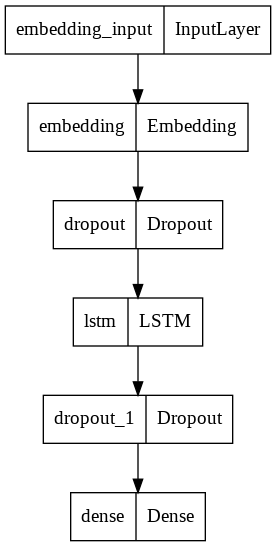

In [40]:
dim = 40
model = Sequential()
model.add(Embedding(voc_size,dim,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(80))
model.add(Dropout(0.3))
model.add(Dense(1,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
plot_model(model)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(final_input, final_output, test_size=0.33, random_state=42)

In [42]:
model.fit(x_train,y_train,batch_size=50, epochs=120, validation_data=(x_test,y_test))
y_pred=model.predict(x_test)

Epoch 1/120
51/51 [==============================] - 7s 18ms/step - loss: 0.0000e+00 - accuracy: 0.1521 - val_loss: 0.0000e+00 - val_accuracy: 0.1691
Epoch 2/120
51/51 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.1521 - val_loss: 0.0000e+00 - val_accuracy: 0.1691
Epoch 3/120
51/51 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 0.1521 - val_loss: 0.0000e+00 - val_accuracy: 0.1691
Epoch 4/120
51/51 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.1521 - val_loss: 0.0000e+00 - val_accuracy: 0.1691
Epoch 5/120
51/51 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 0.1521 - val_loss: 0.0000e+00 - val_accuracy: 0.1691
Epoch 6/120
51/51 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 0.1521 - val_loss: 0.0000e+00 - val_accuracy: 0.1691
Epoch 7/120
51/51 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 0.1521 - 

In [43]:
val = metrics.accuracy_score(y_test,y_pred)
print(val)

0.16905901116427433
